In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy.io.wavfile as wavfile

In [3]:
import simpleaudio as sa

In [4]:
filename='/Users/andersb/Jobb/Undervisning/ExpMetII/440Hz_44100Hz_16bit_05sec.wav'
samplerate, sound = wavfile.read(filename)

/var/folders/tz/s_tt2bnd0pzbthsf96nxldx00000gn/T/ipykernel_13900/2636391890.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound = wavfile.read(filename)


In [5]:
N=sound.shape[0]

In [6]:
dt=1.0/samplerate
freq=np.fft.fftfreq(N,dt)

In [7]:
t=np.linspace(0,N-1,N)/samplerate

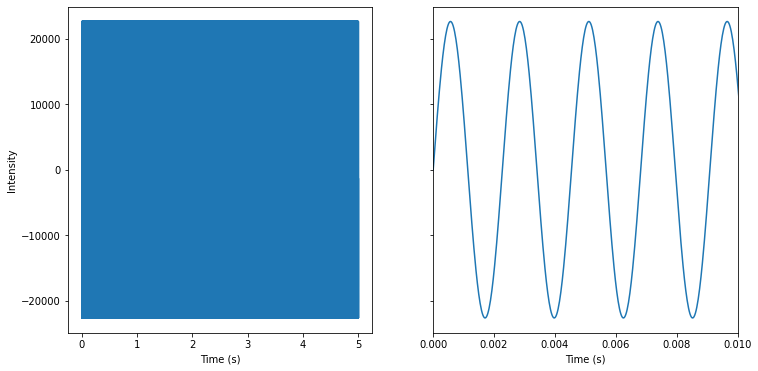

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(12,6))
ax1.plot(t,sound)
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Time (s)')
ax2.plot(t[:1000],sound[:1000])
ax2.set_xlim(0,0.01)
ax2.set_xlabel('Time (s)')
plt.show()

In [9]:
Fsound=np.fft.fft(np.float64(sound[:]))
FsoundW=np.fft.fft(np.float64(sound[:])*np.hanning(N))

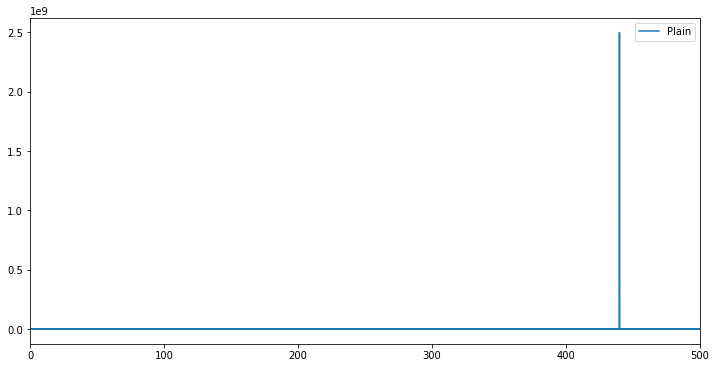

In [10]:
plt.figure(figsize=(12,6))
plt.plot(freq,np.abs(Fsound),label='Plain')
plt.xlim(0,500)
plt.legend()
plt.show()

In [11]:
resound=np.real(np.fft.ifft(Fsound))

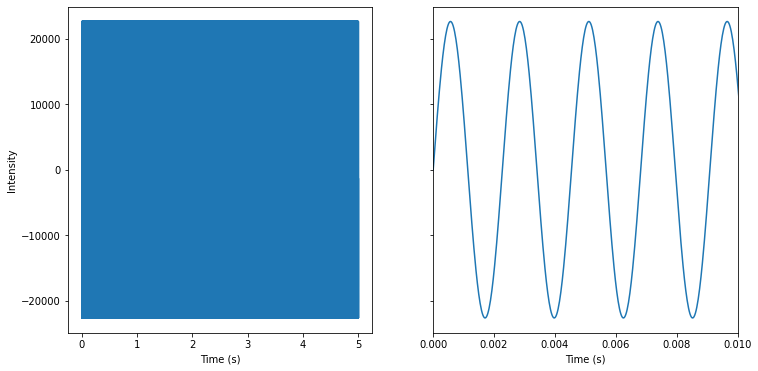

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(12,6))
ax1.plot(t,resound)
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Time (s)')
ax2.plot(t[:1000],resound[:1000])
ax2.set_xlim(0,0.01)
ax2.set_xlabel('Time (s)')
plt.show()

In [13]:
filename='out.wav'
wavfile.write(filename,samplerate,np.int16(resound))

In [14]:
play_obj = sa.play_buffer(np.int16(resound[0:5*samplerate]), 1, 2, samplerate)
play_obj.wait_done()